# Higher Education Students Performance Evaluation
The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict students' end-of-term performances using ML techniques.

Goals:
1. Which feature most impact a student's end-of-term performance
2. Which feature least impact a student's end-of-term performance
3. What impact does having a spouse have on one's end-of-term performance
4. Does artistic or sports activity impact end-of-term performance

Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

Source: https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation

In [85]:
# Import dependencies
import re
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [86]:
df = pd.read_csv('stdperf.csv')
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [87]:
# Replace column names with descriptive names

df_new = df.rename(columns={'1':'stdAge', '2':'Sex', '3':'GradHigh', '4':'Schip', '5':'AddW',
                  '6':'ArtSprt', '7':'Partner', '8':'TotSal', '9':'Transp', '10':'Acc',
                   '11':'MotherEd', '12':'FatherEd', '13':'Sib', '14':'ParStat',
                   '15':'MotherOcc', '16':'FatherOcc', '17':'WeekStd', '18':'ReadFreqN',
                   '19':'ReadFreqS', '20':'AttdConf', '21':'ProjImp', '22':'AttdCls',
                   '23':'PrepMid1', '24':'PrepMid2', '25':'TakeNote', '26':'Listn',
                   '27':'Discn', '28':'FlipCl', '29':'CumGPA', '30':'ExpGPA',
                   'COURSE ID':'CID'
                  
                  })

df_new.head()

,STUDENT ID,stdAge,Sex,GradHigh,Schip,AddW,ArtSprt,Partner,TotSal,Transp,...,PrepMid1,PrepMid2,TakeNote,Listn,Discn,FlipCl,CumGPA,ExpGPA,CID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [88]:
df_new.drop(columns='CID', inplace=True)

In [89]:
# All the values are categorical even though they are numeric
df_new.info() # Check general info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   stdAge      145 non-null    int64 
 2   Sex         145 non-null    int64 
 3   GradHigh    145 non-null    int64 
 4   Schip       145 non-null    int64 
 5   AddW        145 non-null    int64 
 6   ArtSprt     145 non-null    int64 
 7   Partner     145 non-null    int64 
 8   TotSal      145 non-null    int64 
 9   Transp      145 non-null    int64 
 10  Acc         145 non-null    int64 
 11  MotherEd    145 non-null    int64 
 12  FatherEd    145 non-null    int64 
 13  Sib         145 non-null    int64 
 14  ParStat     145 non-null    int64 
 15  MotherOcc   145 non-null    int64 
 16  FatherOcc   145 non-null    int64 
 17  WeekStd     145 non-null    int64 
 18  ReadFreqN   145 non-null    int64 
 19  ReadFreqS   145 non-null    int64 
 20  AttdConf  

In [90]:
df_new.drop(columns='STUDENT ID', inplace=True)

In [91]:
df_new['GRADE'].unique()

array([1, 2, 5, 0, 3, 4, 7, 6])

This dataset contains 145 rows and 33 columns. It contains all numeric values and has no missing values

# Exploratory Data Analysis and Visualization

In [92]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [93]:
# Plotting the histogram

px.histogram(df_new, x='GRADE', nbins=8, title='Count of Student Grades')

From the above histogram, most of the students have a GRADE of 1(DD) and only few failed (GRADE of 0)

# Calculating Correlation betweent the categorical features

Comparing 2 categorical features, I will use Chi-Squared Test

I have these hypotheses:

H0 = There 2 categorical features are not correlated
H1 = There 2 categorical features are correlated

Where p-value < 0.05

Chi-Squared Test result: The probability of H0 being True

I will test out all the features and see which of them are correlated with the GRADE

Then, I will know which features that influence the GRADE




In [94]:
# Creating a crosstab to see the count of the features against the GRADE


# First split features from the target GRADE
df_split = df_new.drop(columns='GRADE')
df_split

,stdAge,Sex,GradHigh,Schip,AddW,ArtSprt,Partner,TotSal,Transp,Acc,...,ProjImp,AttdCls,PrepMid1,PrepMid2,TakeNote,Listn,Discn,FlipCl,CumGPA,ExpGPA
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,1,3,2,1,2,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,1,3,2,3,2,2,3
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,1,2,2,1,1,2,2
3,1,1,1,3,1,2,1,2,1,2,...,1,1,1,2,3,2,2,1,3,2
4,2,2,1,3,2,2,1,3,1,4,...,1,1,2,1,2,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,1,1,2,1,2,1,3,3
141,1,1,2,4,2,2,2,1,4,2,...,1,2,1,1,3,2,2,1,5,3
142,1,1,1,4,2,2,2,1,1,1,...,1,1,1,1,3,3,2,1,4,3
143,2,1,2,4,1,1,1,5,2,3,...,1,1,2,1,2,1,2,1,5,3


In [95]:
# Store target GRADE in a new dataframe

df_grade = df['GRADE']
df_grade.head()

0    1
1    1
2    1
3    1
4    1
Name: GRADE, dtype: int64

In [96]:
# Create the crosstab

# This for loop creates a count of (for example) stdAges and how many of them have certain grades
for col in df_split:
    crt = pd.crosstab(df_split[col],df_grade, margins=True)
    print(crt)

GRADE   0   1   2   3   4   5   6   7  All
stdAge                                    
1       6  13  10   9   4   4   6  13   65
2       2  19  13   7   6  13   7   3   70
3       0   3   1   5   0   0   0   1   10
All     8  35  24  21  10  17  13  17  145
GRADE  0   1   2   3   4   5   6   7  All
Sex                                      
1      8  16  12   7   5   6   4   0   58
2      0  19  12  14   5  11   9  17   87
All    8  35  24  21  10  17  13  17  145
GRADE     0   1   2   3   4   5   6   7  All
GradHigh                                    
1         2   8   5   4   2   0   1   3   25
2         6  21  17  16   7  13  11  12  103
3         0   6   2   1   1   4   1   2   17
All       8  35  24  21  10  17  13  17  145
GRADE  0   1   2   3   4   5   6   7  All
Schip                                    
1      0   0   0   0   1   0   0   0    1
2      0   1   0   0   1   0   0   1    3
3      3  23  13  14   4   8   5   6   76
4      5   4   5   3   2   7   6  10   42
5      0  

In [97]:
# Importing library to calculate Chi-Square

# Want to test the hypotheses

from scipy.stats import chi2_contingency

In [98]:
# Calculate the p-value and accept or reject

def is_correlated(x, y):
    # Create a contingency table from the two columns in the DataFrame
    ct = pd.crosstab(index=df_new[x], columns=df_new[y])
    # Perform the Chi-Square test of independence on the contingency table
    chi_sq_result = chi2_contingency(ct,)
    # Extract the p-value from the Chi-Square test result
    # Determine if the columns are correlated based on the p-value (threshold of 0.05)
    p, x = chi_sq_result[1], 'correlated' if chi_sq_result[1] < 0.05 else 'not correlated'
    # Return the p-value and correlation status
    return p, x

In [99]:
# Iterate over each column name in df_split
for col in df_split:
    # Call the function is_correlated to calculate correlation with 'GRADE'
    p_value, corr = is_correlated(col, 'GRADE')
    
    # Print the results indicating correlation status
    print(f'The p-value of {col} is {p_value}, hence it is {corr} with GRADE')

The p-value of stdAge is 0.010600848506691603, hence it is correlated with GRADE
The p-value of Sex is 0.00045750000457329195, hence it is correlated with GRADE
The p-value of GradHigh is 0.6817663396822627, hence it is not correlated with GRADE
The p-value of Schip is 0.015834747164237634, hence it is correlated with GRADE
The p-value of AddW is 0.20961702594270926, hence it is not correlated with GRADE
The p-value of ArtSprt is 0.24308518222366843, hence it is not correlated with GRADE
The p-value of Partner is 0.16955638640618678, hence it is not correlated with GRADE
The p-value of TotSal is 0.39911401531970736, hence it is not correlated with GRADE
The p-value of Transp is 0.1665676354886524, hence it is not correlated with GRADE
The p-value of Acc is 0.2057332003852983, hence it is not correlated with GRADE
The p-value of MotherEd is 0.03080207694420287, hence it is correlated with GRADE
The p-value of FatherEd is 0.5089951338362353, hence it is not correlated with GRADE
The p-va

In [100]:
# Iterate over each column name in df_split
for col in df_split:
    # Call the function is_correlated to calculate correlation with 'GRADE'
    p_value, corr = is_correlated(col, 'GRADE')
    # Print the results indicating correlation status
    print(f'The p-value of {col} is {p_value}, hence it is {corr} with GRADE')

The p-value of stdAge is 0.010600848506691603, hence it is correlated with GRADE
The p-value of Sex is 0.00045750000457329195, hence it is correlated with GRADE
The p-value of GradHigh is 0.6817663396822627, hence it is not correlated with GRADE
The p-value of Schip is 0.015834747164237634, hence it is correlated with GRADE
The p-value of AddW is 0.20961702594270926, hence it is not correlated with GRADE
The p-value of ArtSprt is 0.24308518222366843, hence it is not correlated with GRADE
The p-value of Partner is 0.16955638640618678, hence it is not correlated with GRADE
The p-value of TotSal is 0.39911401531970736, hence it is not correlated with GRADE
The p-value of Transp is 0.1665676354886524, hence it is not correlated with GRADE
The p-value of Acc is 0.2057332003852983, hence it is not correlated with GRADE
The p-value of MotherEd is 0.03080207694420287, hence it is correlated with GRADE
The p-value of FatherEd is 0.5089951338362353, hence it is not correlated with GRADE
The p-va

In [101]:
# Iterate over each column name in df_split
for col in df_split:
    # Call the function is_correlated to calculate correlation with 'GRADE'
    p_value, corr = is_correlated(col, 'GRADE')
    
    # Check if the p-value is less than 0.05
    if p_value < 0.05:
        # Print the results indicating significant correlation
        print(f'The p-value of {col} is {p_value}, hence it is {corr} with GRADE')
    else:
        # Skip to the next iteration if p-value >= 0.05
        continue

The p-value of stdAge is 0.010600848506691603, hence it is correlated with GRADE
The p-value of Sex is 0.00045750000457329195, hence it is correlated with GRADE
The p-value of Schip is 0.015834747164237634, hence it is correlated with GRADE
The p-value of MotherEd is 0.03080207694420287, hence it is correlated with GRADE
The p-value of ProjImp is 0.02909458488002702, hence it is correlated with GRADE
The p-value of CumGPA is 5.087929780266156e-05, hence it is correlated with GRADE
The p-value of ExpGPA is 0.042591828681106676, hence it is correlated with GRADE


# Interpreting results from the correlation above

There is a correlation between [Student Age; Sex; Scholarship; Mother Education; Project Impact; Cumulative GPA; Expected CGPA; and Course ID ] and GRADE of students

From the p-values:

1. Cumulative GPA has the most impact with p-value (5.087929780266156e-05)

2. If we were to consider other features apart from CGPA, then the most impactful would be Sex followed by Student Age then Scholarship

3. The feature with least impact is (Expected GPA) is Mother Education

4. Spouse and participating in arts and sports does not have any significant impact on the GRADE

In [102]:
df_split.head()

,stdAge,Sex,GradHigh,Schip,AddW,ArtSprt,Partner,TotSal,Transp,Acc,...,ProjImp,AttdCls,PrepMid1,PrepMid2,TakeNote,Listn,Discn,FlipCl,CumGPA,ExpGPA
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,1,3,2,1,2,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,1,3,2,3,2,2,3
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,1,2,2,1,1,2,2
3,1,1,1,3,1,2,1,2,1,2,...,1,1,1,2,3,2,2,1,3,2
4,2,2,1,3,2,2,1,3,1,4,...,1,1,2,1,2,2,2,1,2,2


In [103]:
df_grade.dtypes

dtype('int64')

In [104]:
#plt.scatter(df_grade, df_split, marker='*', color='blue')

In [105]:
# Train Test and Split

In [106]:
#from sklearn.model_selection import train_test_split

In [107]:
#X_train, X_test, y_train, y_test = train_test_split(df_split, df_grade, test_size=0.20, random_state=42)

In [108]:
# Training model

In [109]:
#from sklearn.linear_model import LogisticRegression

In [110]:
#lr = LogisticRegression()
#lr.fit(X_train, y_train)

In [111]:
#lr.predict(X_test)

In [112]:
#lr.score(X_test, y_test)

# Model Tuning

This is a poor score. The model underfitted. I will try the following to tune the model:

1. Standard Scaler
2. L1 or L2 regularization
    

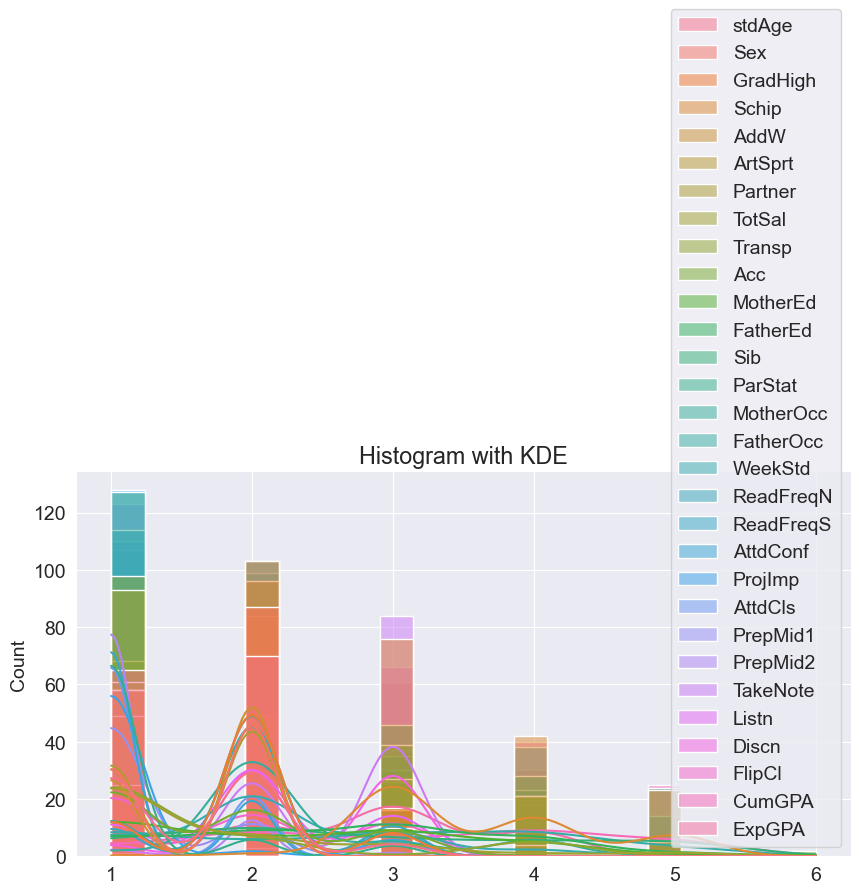

In [113]:
# Feature Scaling using 
plt.figure(figsize=(10, 5))
sns.histplot(df_split, kde=True)
plt.title("Histogram with KDE")
plt.show()

In [114]:
# The features do not follow Gaussian distribution, hence I will use Normalization for feature scaling
# Feature scaling is needed as the feature values for example male is 2 but female is 1 assumes male has more weight than female

# Normalization of features



In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler = MinMaxScaler()

In [117]:
scaled_df = scaler.fit_transform(df_split)

In [118]:
# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df_split.columns)
scaled_df.head()

,stdAge,Sex,GradHigh,Schip,AddW,ArtSprt,Partner,TotSal,Transp,Acc,...,ProjImp,AttdCls,PrepMid1,PrepMid2,TakeNote,Listn,Discn,FlipCl,CumGPA,ExpGPA
0,0.5,1.0,1.0,0.5,0.0,1.0,1.0,0.00,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.5,0.00,0.000000
1,0.5,1.0,1.0,0.5,0.0,1.0,1.0,0.00,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.5,1.0,0.5,0.25,0.666667
2,0.5,1.0,0.5,0.5,1.0,1.0,1.0,0.25,1.0,0.333333,...,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.25,0.333333
3,0.0,0.0,0.0,0.5,0.0,1.0,0.0,0.25,0.0,0.333333,...,0.0,0.0,0.0,0.5,1.0,0.5,0.5,0.0,0.50,0.333333
4,0.5,1.0,0.0,0.5,1.0,1.0,0.0,0.50,0.0,1.000000,...,0.0,0.0,0.5,0.0,0.5,0.5,0.5,0.0,0.25,0.333333


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df_grade, test_size=0.20, random_state=42)

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
normlr = LogisticRegression()
normlr.fit(X_train, y_train)

LogisticRegression()

In [146]:
y_pred = normlr.predict(X_test)
y_pred

array([1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 6, 3, 1, 1, 3, 5, 3, 3, 2, 1, 3, 1,
       7, 3, 3, 7, 5, 7, 2])

In [147]:
normlr.score(X_test, y_test)

0.1724137931034483

# Update

This is a little better. After Normalization, the score increased from 0.13 to 0.17

Let's try L2 regularization

In [161]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=500, max_iter=100, tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=500, max_iter=100, tol=0.1)

In [162]:
ridge_reg.score(X_train,y_train)

0.03717886866389053

In [163]:
ridge_reg.score(X_test, y_test)

0.020037679934113983

In [156]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

-1.1078634247284023